In [17]:
import os, pickle

import gym, eplus_env

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from agent.utils import make_dict

Matplotlib created a temporary config/cache directory at /var/folders/00/3rpdmv9j7hvdmmx587tlkd0m0000gn/T/matplotlib-9hf5tu48 because the default path (/Users/Gaby/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
# Modify here: Outputs from EnergyPlus; Match the variables.cfg file.
obs_name = [
    "Outdoor Temp.", 
    "Outdoor RH", 
    "Wind Speed", 
    "Wind Direction",
    "Diff. Solar Rad.",
    "Direct Solar Rad.", 
    "Htg SP", 
    "Clg SP", 
    "Indoor Temp.", 
    "Indoor Temp. Setpoint",
    "PPD", 
    "Occupancy Flag",
    "Coil Power",
    "HVAC Power", 
    "Sys In Temp.", 
    "Sys In Mdot", 
    "OA Temp.", 
    "OA Mdot", 
    "MA Temp.", 
    "MA Mdot", 
    "Sys Out Temp.", 
    "Sys Out Mdot"
]
dist_name = ["Outdoor Temp.", "Outdoor RH", "Wind Speed", "Wind Direction", "Diff. Solar Rad.", "Direct Solar Rad.", "Indoor Temp. Setpoint", "Occupancy Flag"]

In [3]:
# Create Environment. Follow the documentation of 'Gym-Eplus' to set up additional EnergyPlus simulation environment.
env = gym.make('5Zone-sim_TMY2-v0');
#env = gym.make('5Zone-sim_TMY3-v0');

In [4]:
# Reset the env (creat the EnergyPlus subprocess)
timeStep, obs, isTerminal = env.reset();
obs_dict = make_dict(obs_name, obs)
start_time = pd.datetime(year = env.start_year, month = env.start_mon, day = env.start_day)
print(start_time)

timeStamp = [start_time]
observations = [obs]
actions = []

[2020-09-09 14:37:34,537] EPLUS_ENV_5Zone-sim-v0_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2020-09-09 14:37:34,550] EPLUS_ENV_5Zone-sim-v0_MainThread_ROOT INFO:EnergyPlus working directory is in /Users/Gaby/Documents/uofa/hvac_control/Gnu-RL/Eplus-env-5Zone-sim-v0-res6/Eplus-env-sub_run1


1991-01-01 00:00:00


/Users/Gaby/Documents/uofa/hvac_control/Gnu-RL/hvac_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


In [6]:
for i in range(91*96):
    # Using EnergyPlus default control strategy;
    action = ()
    timeStep, obs, isTerminal = env.step(action)
    obs_dict = make_dict(obs_name, obs)
    cur_time = start_time + pd.Timedelta(seconds = timeStep)
    
    print("{}:  Sys Out: {:.2f}({:.2f})-> OA: {:.2f}({:.2f})-> MA: {:.2f}({:.2f})-> Sys Out: {:.2f}({:.2f})-> Zone Temp: {:.2f}".format(cur_time,
                                                    obs_dict["Sys In Temp."], obs_dict["Sys In Mdot"],obs_dict["OA Temp."], obs_dict["OA Mdot"],
                                                    obs_dict["MA Temp."], obs_dict["MA Mdot"], obs_dict["Sys Out Temp."], obs_dict["Sys Out Mdot"],
                                                    obs_dict["Indoor Temp."]))

    timeStamp.append(cur_time)
    observations.append(obs)
    #actions.append(action)

1991-01-01 00:15:00:  Sys Out: 12.71(1.70)-> OA: -3.85(0.27)-> MA: 10.07(1.70)-> Sys Out: 12.84(1.70)-> Zone Temp: 12.64
1991-01-01 00:30:00:  Sys Out: 12.61(1.70)-> OA: -3.30(0.27)-> MA: 10.07(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.75
1991-01-01 00:45:00:  Sys Out: 12.57(1.70)-> OA: -2.75(0.27)-> MA: 10.13(1.70)-> Sys Out: 12.81(1.70)-> Zone Temp: 12.64
1991-01-01 01:00:00:  Sys Out: 12.49(1.70)-> OA: -2.20(0.27)-> MA: 10.15(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.77
1991-01-01 01:15:00:  Sys Out: 12.47(1.70)-> OA: -2.20(0.27)-> MA: 10.13(1.70)-> Sys Out: 12.69(1.70)-> Zone Temp: 12.68
1991-01-01 01:30:00:  Sys Out: 12.41(1.70)-> OA: -2.20(0.27)-> MA: 10.08(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.77
1991-01-01 01:45:00:  Sys Out: 12.40(1.70)-> OA: -2.20(0.27)-> MA: 10.07(1.70)-> Sys Out: 12.75(1.70)-> Zone Temp: 12.67
1991-01-01 02:00:00:  Sys Out: 12.35(1.70)-> OA: -2.20(0.27)-> MA: 10.03(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.77
1991-01-01 02:15:00:  Sys Out: 1

1991-01-02 20:30:00:  Sys Out: 14.81(1.70)-> OA: -3.90(0.27)-> MA: 11.83(1.70)-> Sys Out: 12.22(1.70)-> Zone Temp: 13.76
1991-01-02 20:45:00:  Sys Out: 14.45(1.70)-> OA: -3.90(0.27)-> MA: 11.52(1.70)-> Sys Out: 11.91(1.70)-> Zone Temp: 13.48
1991-01-02 21:00:00:  Sys Out: 14.12(1.70)-> OA: -3.90(0.27)-> MA: 11.25(1.70)-> Sys Out: 11.70(1.70)-> Zone Temp: 13.22
1991-01-02 21:15:00:  Sys Out: 13.83(1.70)-> OA: -3.90(0.27)-> MA: 11.01(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 13.00
1991-01-02 21:30:00:  Sys Out: 13.65(1.70)-> OA: -3.90(0.27)-> MA: 10.86(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.86
1991-01-02 21:45:00:  Sys Out: 13.43(1.70)-> OA: -3.90(0.27)-> MA: 10.67(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.75
1991-01-02 22:00:00:  Sys Out: 13.27(1.70)-> OA: -3.90(0.27)-> MA: 10.53(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.67
1991-01-02 22:15:00:  Sys Out: 13.11(1.70)-> OA: -3.75(0.27)-> MA: 10.42(1.70)-> Sys Out: 12.78(1.70)-> Zone Temp: 12.60
1991-01-02 22:30:00:  Sys Out: 1

1991-01-04 19:15:00:  Sys Out: 20.87(0.48)-> OA: 5.60(0.29)-> MA: 11.63(0.48)-> Sys Out: 12.00(0.48)-> Zone Temp: 18.27
1991-01-04 19:30:00:  Sys Out: 20.32(0.49)-> OA: 5.60(0.29)-> MA: 11.63(0.49)-> Sys Out: 12.00(0.49)-> Zone Temp: 17.88
1991-01-04 19:45:00:  Sys Out: 19.78(0.50)-> OA: 5.60(0.29)-> MA: 11.64(0.50)-> Sys Out: 12.00(0.50)-> Zone Temp: 17.48
1991-01-04 20:00:00:  Sys Out: 19.40(0.51)-> OA: 5.60(0.29)-> MA: 11.64(0.51)-> Sys Out: 12.00(0.51)-> Zone Temp: 17.16
1991-01-04 20:15:00:  Sys Out: 19.04(0.52)-> OA: 5.45(0.28)-> MA: 11.65(0.52)-> Sys Out: 12.00(0.52)-> Zone Temp: 16.88
1991-01-04 20:30:00:  Sys Out: 18.68(0.54)-> OA: 5.30(0.28)-> MA: 11.66(0.54)-> Sys Out: 12.00(0.54)-> Zone Temp: 16.63
1991-01-04 20:45:00:  Sys Out: 18.33(0.55)-> OA: 5.15(0.28)-> MA: 11.67(0.55)-> Sys Out: 12.00(0.55)-> Zone Temp: 16.40
1991-01-04 21:00:00:  Sys Out: 18.00(0.57)-> OA: 5.00(0.28)-> MA: 11.68(0.57)-> Sys Out: 12.00(0.57)-> Zone Temp: 16.19
1991-01-04 21:15:00:  Sys Out: 17.76(0.5

1991-01-06 10:15:00:  Sys Out: 19.82(1.96)-> OA: 5.72(0.51)-> MA: 14.65(1.96)-> Sys Out: 16.61(1.96)-> Zone Temp: 20.85
1991-01-06 10:30:00:  Sys Out: 20.02(0.91)-> OA: 5.85(0.55)-> MA: 11.36(0.91)-> Sys Out: 12.00(0.91)-> Zone Temp: 21.17
1991-01-06 10:45:00:  Sys Out: 20.02(0.94)-> OA: 5.97(0.55)-> MA: 11.79(0.94)-> Sys Out: 12.01(0.94)-> Zone Temp: 20.65
1991-01-06 11:00:00:  Sys Out: 20.06(0.93)-> OA: 6.10(0.55)-> MA: 11.78(0.93)-> Sys Out: 12.00(0.93)-> Zone Temp: 20.48
1991-01-06 11:15:00:  Sys Out: 20.10(0.92)-> OA: 6.25(0.55)-> MA: 11.78(0.92)-> Sys Out: 12.00(0.92)-> Zone Temp: 20.39
1991-01-06 11:30:00:  Sys Out: 20.16(0.91)-> OA: 6.40(0.55)-> MA: 11.78(0.91)-> Sys Out: 12.00(0.91)-> Zone Temp: 20.38
1991-01-06 11:45:00:  Sys Out: 20.23(0.90)-> OA: 6.55(0.55)-> MA: 11.79(0.90)-> Sys Out: 12.00(0.90)-> Zone Temp: 20.40
1991-01-06 12:00:00:  Sys Out: 20.31(0.88)-> OA: 6.70(0.55)-> MA: 11.79(0.88)-> Sys Out: 12.00(0.88)-> Zone Temp: 20.43
1991-01-06 12:15:00:  Sys Out: 20.39(0.8

1991-01-08 01:45:00:  Sys Out: 12.99(1.70)-> OA: 0.60(0.27)-> MA: 11.01(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.88
1991-01-08 02:00:00:  Sys Out: 12.91(1.70)-> OA: 0.60(0.27)-> MA: 10.95(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.85
1991-01-08 02:15:00:  Sys Out: 12.85(1.70)-> OA: 0.60(0.27)-> MA: 10.89(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.82
1991-01-08 02:30:00:  Sys Out: 12.79(1.70)-> OA: 0.60(0.27)-> MA: 10.84(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.79
1991-01-08 02:45:00:  Sys Out: 12.73(1.70)-> OA: 0.60(0.27)-> MA: 10.80(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.77
1991-01-08 03:00:00:  Sys Out: 12.68(1.70)-> OA: 0.60(0.27)-> MA: 10.76(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.75
1991-01-08 03:15:00:  Sys Out: 12.64(1.70)-> OA: 0.60(0.27)-> MA: 10.72(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.73
1991-01-08 03:30:00:  Sys Out: 12.60(1.70)-> OA: 0.60(0.27)-> MA: 10.68(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.72
1991-01-08 03:45:00:  Sys Out: 12.56(1.7

1991-01-10 01:00:00:  Sys Out: 11.69(1.70)-> OA: -14.40(0.27)-> MA: 7.53(1.70)-> Sys Out: 13.30(1.70)-> Zone Temp: 12.26
1991-01-10 01:15:00:  Sys Out: 11.62(1.70)-> OA: -14.55(0.27)-> MA: 7.45(1.70)-> Sys Out: 13.22(1.70)-> Zone Temp: 12.20
1991-01-10 01:30:00:  Sys Out: 11.55(1.70)-> OA: -14.70(0.27)-> MA: 7.37(1.70)-> Sys Out: 13.14(1.70)-> Zone Temp: 12.15
1991-01-10 01:45:00:  Sys Out: 11.49(1.70)-> OA: -14.85(0.27)-> MA: 7.29(1.70)-> Sys Out: 13.06(1.70)-> Zone Temp: 12.10
1991-01-10 02:00:00:  Sys Out: 11.42(1.70)-> OA: -15.00(0.27)-> MA: 7.21(1.70)-> Sys Out: 12.98(1.70)-> Zone Temp: 12.04
1991-01-10 02:15:00:  Sys Out: 11.36(1.70)-> OA: -15.15(0.27)-> MA: 7.14(1.70)-> Sys Out: 12.91(1.70)-> Zone Temp: 11.99
1991-01-10 02:30:00:  Sys Out: 11.30(1.70)-> OA: -15.30(0.27)-> MA: 7.06(1.70)-> Sys Out: 12.83(1.70)-> Zone Temp: 11.93
1991-01-10 02:45:00:  Sys Out: 11.24(1.70)-> OA: -15.45(0.27)-> MA: 6.98(1.70)-> Sys Out: 12.75(1.70)-> Zone Temp: 11.87
1991-01-10 03:00:00:  Sys Out: 1

1991-01-11 12:00:00:  Sys Out: 18.35(2.96)-> OA: -12.80(0.47)-> MA: 13.39(2.96)-> Sys Out: 17.12(2.96)-> Zone Temp: 20.62
1991-01-11 12:15:00:  Sys Out: 18.86(2.96)-> OA: -12.25(0.47)-> MA: 13.90(2.96)-> Sys Out: 17.63(2.96)-> Zone Temp: 21.18
1991-01-11 12:30:00:  Sys Out: 19.38(2.96)-> OA: -11.70(0.47)-> MA: 14.43(2.96)-> Sys Out: 18.16(2.96)-> Zone Temp: 21.71
1991-01-11 12:45:00:  Sys Out: 19.74(2.96)-> OA: -11.15(0.47)-> MA: 14.82(2.96)-> Sys Out: 18.55(2.96)-> Zone Temp: 22.26
1991-01-11 13:00:00:  Sys Out: 20.32(2.96)-> OA: -10.60(0.47)-> MA: 15.40(2.96)-> Sys Out: 19.13(2.96)-> Zone Temp: 22.71
1991-01-11 13:15:00:  Sys Out: 20.74(2.96)-> OA: -10.60(0.47)-> MA: 15.75(2.96)-> Sys Out: 17.93(2.96)-> Zone Temp: 23.30
1991-01-11 13:30:00:  Sys Out: 21.02(2.96)-> OA: -10.60(0.47)-> MA: 15.99(2.96)-> Sys Out: 18.69(2.96)-> Zone Temp: 23.12
1991-01-11 13:45:00:  Sys Out: 21.18(2.96)-> OA: -10.60(0.47)-> MA: 16.12(2.96)-> Sys Out: 17.79(2.96)-> Zone Temp: 23.37
1991-01-11 14:00:00:  Sy

1991-01-12 11:45:00:  Sys Out: 19.31(2.96)-> OA: -9.32(0.47)-> MA: 14.75(2.96)-> Sys Out: 18.48(2.96)-> Zone Temp: 21.28
1991-01-12 12:00:00:  Sys Out: 19.85(2.96)-> OA: -8.90(0.47)-> MA: 15.27(2.96)-> Sys Out: 17.97(2.96)-> Zone Temp: 21.85
1991-01-12 12:15:00:  Sys Out: 20.24(2.96)-> OA: -8.48(0.47)-> MA: 15.67(2.96)-> Sys Out: 18.37(2.96)-> Zone Temp: 21.74
1991-01-12 12:30:00:  Sys Out: 20.52(2.96)-> OA: -8.05(0.47)-> MA: 15.97(2.96)-> Sys Out: 18.67(2.96)-> Zone Temp: 22.02
1991-01-12 12:45:00:  Sys Out: 20.66(2.96)-> OA: -7.62(0.47)-> MA: 16.15(2.96)-> Sys Out: 18.34(2.96)-> Zone Temp: 22.46
1991-01-12 13:00:00:  Sys Out: 20.80(2.96)-> OA: -7.20(0.47)-> MA: 16.34(2.96)-> Sys Out: 16.99(2.96)-> Zone Temp: 22.73
1991-01-12 13:15:00:  Sys Out: 21.03(2.96)-> OA: -7.08(0.47)-> MA: 16.55(2.96)-> Sys Out: 18.74(2.96)-> Zone Temp: 22.26
1991-01-12 13:30:00:  Sys Out: 21.10(2.96)-> OA: -6.95(0.47)-> MA: 16.64(2.96)-> Sys Out: 17.28(2.96)-> Zone Temp: 23.00
1991-01-12 13:45:00:  Sys Out: 2

1991-01-14 04:00:00:  Sys Out: 12.15(1.70)-> OA: -5.60(0.27)-> MA: 9.32(1.70)-> Sys Out: 12.78(1.70)-> Zone Temp: 12.76
1991-01-14 04:15:00:  Sys Out: 12.16(1.70)-> OA: -5.60(0.27)-> MA: 9.33(1.70)-> Sys Out: 12.86(1.70)-> Zone Temp: 12.80
1991-01-14 04:30:00:  Sys Out: 12.19(1.70)-> OA: -5.60(0.27)-> MA: 9.35(1.70)-> Sys Out: 12.85(1.70)-> Zone Temp: 12.81
1991-01-14 04:45:00:  Sys Out: 12.19(1.70)-> OA: -5.60(0.27)-> MA: 9.35(1.70)-> Sys Out: 12.84(1.70)-> Zone Temp: 12.81
1991-01-14 05:00:00:  Sys Out: 12.19(1.70)-> OA: -5.60(0.27)-> MA: 9.35(1.70)-> Sys Out: 12.84(1.70)-> Zone Temp: 12.81
1991-01-14 05:15:00:  Sys Out: 12.18(1.70)-> OA: -5.72(0.27)-> MA: 9.33(1.70)-> Sys Out: 12.86(1.70)-> Zone Temp: 12.81
1991-01-14 05:30:00:  Sys Out: 12.18(1.70)-> OA: -5.85(0.27)-> MA: 9.31(1.70)-> Sys Out: 12.88(1.70)-> Zone Temp: 12.81
1991-01-14 05:45:00:  Sys Out: 12.18(1.70)-> OA: -5.97(0.27)-> MA: 9.29(1.70)-> Sys Out: 12.89(1.70)-> Zone Temp: 12.81
1991-01-14 06:00:00:  Sys Out: 12.18(1.7

1991-01-15 18:15:00:  Sys Out: 20.41(1.70)-> OA: 2.08(0.27)-> MA: 17.50(1.70)-> Sys Out: 17.88(1.70)-> Zone Temp: 20.34
1991-01-15 18:30:00:  Sys Out: 19.66(1.70)-> OA: 1.95(0.27)-> MA: 16.85(1.70)-> Sys Out: 17.23(1.70)-> Zone Temp: 19.03
1991-01-15 18:45:00:  Sys Out: 19.09(1.70)-> OA: 1.82(0.27)-> MA: 16.34(1.70)-> Sys Out: 16.73(1.70)-> Zone Temp: 18.13
1991-01-15 19:00:00:  Sys Out: 18.36(1.70)-> OA: 1.70(0.27)-> MA: 15.71(1.70)-> Sys Out: 16.10(1.70)-> Zone Temp: 17.31
1991-01-15 19:15:00:  Sys Out: 17.93(1.70)-> OA: 1.70(0.27)-> MA: 15.35(1.70)-> Sys Out: 15.73(1.70)-> Zone Temp: 16.69
1991-01-15 19:30:00:  Sys Out: 17.48(1.70)-> OA: 1.70(0.27)-> MA: 14.97(1.70)-> Sys Out: 15.35(1.70)-> Zone Temp: 16.25
1991-01-15 19:45:00:  Sys Out: 16.99(1.70)-> OA: 1.70(0.27)-> MA: 14.56(1.70)-> Sys Out: 14.95(1.70)-> Zone Temp: 15.87
1991-01-15 20:00:00:  Sys Out: 16.72(1.70)-> OA: 1.70(0.27)-> MA: 14.33(1.70)-> Sys Out: 14.72(1.70)-> Zone Temp: 15.68
1991-01-15 20:15:00:  Sys Out: 16.49(1.7

1991-01-17 10:15:00:  Sys Out: 18.63(3.00)-> OA: -6.43(0.48)-> MA: 14.64(3.00)-> Sys Out: 18.33(3.00)-> Zone Temp: 20.71
1991-01-17 10:30:00:  Sys Out: 19.27(3.07)-> OA: -6.15(0.49)-> MA: 15.22(3.07)-> Sys Out: 18.86(3.07)-> Zone Temp: 21.17
1991-01-17 10:45:00:  Sys Out: 19.70(3.03)-> OA: -5.87(0.48)-> MA: 15.63(3.03)-> Sys Out: 17.76(3.03)-> Zone Temp: 21.72
1991-01-17 11:00:00:  Sys Out: 20.10(3.03)-> OA: -5.60(0.48)-> MA: 16.01(3.03)-> Sys Out: 18.14(3.03)-> Zone Temp: 21.50
1991-01-17 11:15:00:  Sys Out: 20.34(3.03)-> OA: -5.30(0.48)-> MA: 16.26(3.03)-> Sys Out: 18.38(3.03)-> Zone Temp: 21.68
1991-01-17 11:30:00:  Sys Out: 20.54(2.96)-> OA: -5.00(0.47)-> MA: 16.48(2.96)-> Sys Out: 17.12(2.96)-> Zone Temp: 21.93
1991-01-17 11:45:00:  Sys Out: 20.60(2.96)-> OA: -4.70(0.47)-> MA: 16.58(2.96)-> Sys Out: 17.22(2.96)-> Zone Temp: 21.88
1991-01-17 12:00:00:  Sys Out: 20.68(2.96)-> OA: -4.40(0.47)-> MA: 16.69(2.96)-> Sys Out: 17.33(2.96)-> Zone Temp: 21.90
1991-01-17 12:15:00:  Sys Out: 2

1991-01-19 13:30:00:  Sys Out: 20.31(2.96)-> OA: -6.95(0.47)-> MA: 15.97(2.96)-> Sys Out: 18.15(2.96)-> Zone Temp: 20.15
1991-01-19 13:45:00:  Sys Out: 20.31(2.96)-> OA: -7.08(0.47)-> MA: 15.94(2.96)-> Sys Out: 18.13(2.96)-> Zone Temp: 20.09
1991-01-19 14:00:00:  Sys Out: 20.33(2.96)-> OA: -7.20(0.47)-> MA: 15.95(2.96)-> Sys Out: 18.13(2.96)-> Zone Temp: 20.07
1991-01-19 14:15:00:  Sys Out: 20.36(2.96)-> OA: -7.08(0.47)-> MA: 15.99(2.96)-> Sys Out: 18.17(2.96)-> Zone Temp: 20.05
1991-01-19 14:30:00:  Sys Out: 20.39(2.96)-> OA: -6.95(0.47)-> MA: 16.04(2.96)-> Sys Out: 18.22(2.96)-> Zone Temp: 20.06
1991-01-19 14:45:00:  Sys Out: 20.42(2.96)-> OA: -6.83(0.47)-> MA: 16.08(2.96)-> Sys Out: 18.26(2.96)-> Zone Temp: 20.07
1991-01-19 15:00:00:  Sys Out: 20.45(2.96)-> OA: -6.70(0.47)-> MA: 16.13(2.96)-> Sys Out: 18.31(2.96)-> Zone Temp: 20.08
1991-01-19 15:15:00:  Sys Out: 20.47(2.96)-> OA: -6.55(0.47)-> MA: 16.17(2.96)-> Sys Out: 18.35(2.96)-> Zone Temp: 20.08
1991-01-19 15:30:00:  Sys Out: 2

1991-01-21 14:00:00:  Sys Out: 20.74(2.96)-> OA: 0.60(0.47)-> MA: 17.53(2.96)-> Sys Out: 18.17(2.96)-> Zone Temp: 20.55
1991-01-21 14:15:00:  Sys Out: 20.79(2.96)-> OA: 0.72(0.47)-> MA: 17.60(2.96)-> Sys Out: 18.24(2.96)-> Zone Temp: 20.56
1991-01-21 14:30:00:  Sys Out: 20.84(2.96)-> OA: 0.85(0.47)-> MA: 17.65(2.96)-> Sys Out: 18.29(2.96)-> Zone Temp: 20.55
1991-01-21 14:45:00:  Sys Out: 20.86(2.96)-> OA: 0.98(0.47)-> MA: 17.69(2.96)-> Sys Out: 18.33(2.96)-> Zone Temp: 20.41
1991-01-21 15:00:00:  Sys Out: 20.83(2.96)-> OA: 1.10(0.47)-> MA: 17.69(2.96)-> Sys Out: 18.32(2.96)-> Zone Temp: 20.33
1991-01-21 15:15:00:  Sys Out: 20.83(2.96)-> OA: 1.10(0.47)-> MA: 17.69(2.96)-> Sys Out: 20.38(2.96)-> Zone Temp: 20.29
1991-01-21 15:30:00:  Sys Out: 21.01(2.96)-> OA: 1.10(0.47)-> MA: 17.83(2.96)-> Sys Out: 18.47(2.96)-> Zone Temp: 21.07
1991-01-21 15:45:00:  Sys Out: 21.15(2.96)-> OA: 1.10(0.47)-> MA: 17.96(2.96)-> Sys Out: 18.59(2.96)-> Zone Temp: 20.71
1991-01-21 16:00:00:  Sys Out: 21.05(2.9

1991-01-23 16:45:00:  Sys Out: 22.26(2.96)-> OA: -3.17(0.47)-> MA: 18.21(2.96)-> Sys Out: 18.85(2.96)-> Zone Temp: 22.44
1991-01-23 17:00:00:  Sys Out: 22.12(2.96)-> OA: -3.30(0.47)-> MA: 18.07(2.96)-> Sys Out: 18.71(2.96)-> Zone Temp: 22.11
1991-01-23 17:15:00:  Sys Out: 21.94(2.96)-> OA: -3.73(0.47)-> MA: 17.86(2.96)-> Sys Out: 18.50(2.96)-> Zone Temp: 21.72
1991-01-23 17:30:00:  Sys Out: 21.73(2.96)-> OA: -4.15(0.47)-> MA: 17.62(2.96)-> Sys Out: 20.31(2.96)-> Zone Temp: 21.25
1991-01-23 17:45:00:  Sys Out: 21.64(2.96)-> OA: -4.57(0.47)-> MA: 17.47(2.96)-> Sys Out: 19.14(2.96)-> Zone Temp: 21.44
1991-01-23 18:00:00:  Sys Out: 21.59(2.96)-> OA: -5.00(0.47)-> MA: 17.36(2.96)-> Sys Out: 20.05(2.96)-> Zone Temp: 21.08
1991-01-23 18:15:00:  Sys Out: 21.01(1.70)-> OA: -5.15(0.27)-> MA: 16.85(1.70)-> Sys Out: 17.24(1.70)-> Zone Temp: 21.20
1991-01-23 18:30:00:  Sys Out: 20.10(1.70)-> OA: -5.30(0.27)-> MA: 16.06(1.70)-> Sys Out: 16.44(1.70)-> Zone Temp: 19.32
1991-01-23 18:45:00:  Sys Out: 1

1991-01-25 13:00:00:  Sys Out: 22.72(0.94)-> OA: 5.60(0.60)-> MA: 11.77(0.94)-> Sys Out: 11.99(0.94)-> Zone Temp: 23.90
1991-01-25 13:15:00:  Sys Out: 22.91(0.93)-> OA: 5.72(0.60)-> MA: 11.78(0.93)-> Sys Out: 12.00(0.93)-> Zone Temp: 23.90
1991-01-25 13:30:00:  Sys Out: 23.10(0.90)-> OA: 5.85(0.59)-> MA: 11.78(0.90)-> Sys Out: 11.99(0.90)-> Zone Temp: 23.90
1991-01-25 13:45:00:  Sys Out: 23.25(0.90)-> OA: 5.97(0.60)-> MA: 11.79(0.90)-> Sys Out: 12.00(0.90)-> Zone Temp: 23.90
1991-01-25 14:00:00:  Sys Out: 23.41(0.92)-> OA: 6.10(0.61)-> MA: 11.79(0.92)-> Sys Out: 12.00(0.92)-> Zone Temp: 23.90
1991-01-25 14:15:00:  Sys Out: 23.55(0.92)-> OA: 6.25(0.63)-> MA: 11.78(0.92)-> Sys Out: 12.00(0.92)-> Zone Temp: 23.90
1991-01-25 14:30:00:  Sys Out: 23.70(0.93)-> OA: 6.40(0.64)-> MA: 11.78(0.93)-> Sys Out: 12.00(0.93)-> Zone Temp: 23.89
1991-01-25 14:45:00:  Sys Out: 23.83(0.94)-> OA: 6.55(0.65)-> MA: 11.78(0.94)-> Sys Out: 12.00(0.94)-> Zone Temp: 23.88
1991-01-25 15:00:00:  Sys Out: 23.95(0.9

1991-01-27 05:00:00:  Sys Out: 13.70(1.70)-> OA: 1.10(0.27)-> MA: 11.69(1.70)-> Sys Out: 12.08(1.70)-> Zone Temp: 13.44
1991-01-27 05:15:00:  Sys Out: 13.59(1.70)-> OA: 0.83(0.27)-> MA: 11.56(1.70)-> Sys Out: 11.94(1.70)-> Zone Temp: 13.34
1991-01-27 05:30:00:  Sys Out: 13.49(1.70)-> OA: 0.55(0.27)-> MA: 11.43(1.70)-> Sys Out: 11.81(1.70)-> Zone Temp: 13.24
1991-01-27 05:45:00:  Sys Out: 13.38(1.70)-> OA: 0.28(0.27)-> MA: 11.30(1.70)-> Sys Out: 11.68(1.70)-> Zone Temp: 13.14
1991-01-27 06:00:00:  Sys Out: 13.28(1.70)-> OA: 0.00(0.27)-> MA: 11.16(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 13.03
1991-01-27 06:15:00:  Sys Out: 13.17(1.70)-> OA: -0.15(0.27)-> MA: 11.05(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.94
1991-01-27 06:30:00:  Sys Out: 13.07(1.70)-> OA: -0.30(0.27)-> MA: 10.94(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.88
1991-01-27 06:45:00:  Sys Out: 12.98(1.70)-> OA: -0.45(0.27)-> MA: 10.84(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.83
1991-01-27 07:00:00:  Sys Out: 12.90(

1991-01-28 13:30:00:  Sys Out: 20.29(2.96)-> OA: -3.35(0.47)-> MA: 16.53(2.96)-> Sys Out: 17.17(2.96)-> Zone Temp: 20.02
1991-01-28 13:45:00:  Sys Out: 20.29(2.96)-> OA: -3.08(0.47)-> MA: 16.57(2.96)-> Sys Out: 17.21(2.96)-> Zone Temp: 20.02
1991-01-28 14:00:00:  Sys Out: 20.43(2.96)-> OA: -2.80(0.47)-> MA: 16.73(2.96)-> Sys Out: 19.68(2.96)-> Zone Temp: 19.96
1991-01-28 14:15:00:  Sys Out: 20.62(2.96)-> OA: -2.80(0.47)-> MA: 16.89(2.96)-> Sys Out: 19.07(2.96)-> Zone Temp: 20.77
1991-01-28 14:30:00:  Sys Out: 20.69(2.96)-> OA: -2.80(0.47)-> MA: 16.95(2.96)-> Sys Out: 17.59(2.96)-> Zone Temp: 20.98
1991-01-28 14:45:00:  Sys Out: 20.75(2.96)-> OA: -2.80(0.47)-> MA: 17.00(2.96)-> Sys Out: 19.18(2.96)-> Zone Temp: 20.28
1991-01-28 15:00:00:  Sys Out: 20.85(2.96)-> OA: -2.80(0.47)-> MA: 17.09(2.96)-> Sys Out: 19.27(2.96)-> Zone Temp: 20.55
1991-01-28 15:15:00:  Sys Out: 20.95(2.96)-> OA: -2.92(0.47)-> MA: 17.16(2.96)-> Sys Out: 19.34(2.96)-> Zone Temp: 20.61
1991-01-28 15:30:00:  Sys Out: 2

1991-01-29 21:00:00:  Sys Out: 14.87(1.70)-> OA: -2.80(0.27)-> MA: 12.05(1.70)-> Sys Out: 12.44(1.70)-> Zone Temp: 13.98
1991-01-29 21:15:00:  Sys Out: 14.67(1.70)-> OA: -2.80(0.27)-> MA: 11.88(1.70)-> Sys Out: 12.27(1.70)-> Zone Temp: 13.77
1991-01-29 21:30:00:  Sys Out: 14.39(1.70)-> OA: -2.80(0.27)-> MA: 11.65(1.70)-> Sys Out: 12.04(1.70)-> Zone Temp: 13.56
1991-01-29 21:45:00:  Sys Out: 14.14(1.70)-> OA: -2.80(0.27)-> MA: 11.44(1.70)-> Sys Out: 11.83(1.70)-> Zone Temp: 13.38
1991-01-29 22:00:00:  Sys Out: 13.97(1.70)-> OA: -2.80(0.27)-> MA: 11.29(1.70)-> Sys Out: 11.68(1.70)-> Zone Temp: 13.20
1991-01-29 22:15:00:  Sys Out: 13.76(1.70)-> OA: -2.25(0.27)-> MA: 11.21(1.70)-> Sys Out: 11.59(1.70)-> Zone Temp: 13.04
1991-01-29 22:30:00:  Sys Out: 13.52(1.70)-> OA: -1.70(0.27)-> MA: 11.09(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.92
1991-01-29 22:45:00:  Sys Out: 13.35(1.70)-> OA: -1.15(0.27)-> MA: 11.04(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.85
1991-01-29 23:00:00:  Sys Out: 1

1991-02-01 01:30:00:  Sys Out: 12.29(1.70)-> OA: -0.45(0.27)-> MA: 10.26(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.78
1991-02-01 01:45:00:  Sys Out: 12.31(1.70)-> OA: -0.28(0.27)-> MA: 10.30(1.70)-> Sys Out: 13.06(1.70)-> Zone Temp: 12.65
1991-02-01 02:00:00:  Sys Out: 12.28(1.70)-> OA: -0.10(0.27)-> MA: 10.30(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.78
1991-02-01 02:15:00:  Sys Out: 12.31(1.70)-> OA: 0.02(0.27)-> MA: 10.35(1.70)-> Sys Out: 12.98(1.70)-> Zone Temp: 12.65
1991-02-01 02:30:00:  Sys Out: 12.27(1.70)-> OA: 0.15(0.27)-> MA: 10.34(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.78
1991-02-01 02:45:00:  Sys Out: 12.31(1.70)-> OA: 0.28(0.27)-> MA: 10.39(1.70)-> Sys Out: 12.88(1.70)-> Zone Temp: 12.66
1991-02-01 03:00:00:  Sys Out: 12.28(1.70)-> OA: 0.40(0.27)-> MA: 10.38(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.78
1991-02-01 03:15:00:  Sys Out: 12.31(1.70)-> OA: 0.60(0.27)-> MA: 10.44(1.70)-> Sys Out: 12.78(1.70)-> Zone Temp: 12.67
1991-02-01 03:30:00:  Sys Out: 12.29(

1991-02-03 09:45:00:  Sys Out: 16.33(2.96)-> OA: -8.57(0.47)-> MA: 12.36(2.96)-> Sys Out: 16.09(2.96)-> Zone Temp: 17.51
1991-02-03 10:00:00:  Sys Out: 16.87(2.96)-> OA: -8.30(0.47)-> MA: 12.86(2.96)-> Sys Out: 16.59(2.96)-> Zone Temp: 18.14
1991-02-03 10:15:00:  Sys Out: 17.42(2.96)-> OA: -7.75(0.47)-> MA: 13.41(2.96)-> Sys Out: 17.14(2.96)-> Zone Temp: 18.75
1991-02-03 10:30:00:  Sys Out: 17.99(2.96)-> OA: -7.20(0.47)-> MA: 13.98(2.96)-> Sys Out: 17.70(2.96)-> Zone Temp: 19.39
1991-02-03 10:45:00:  Sys Out: 18.58(2.96)-> OA: -6.65(0.47)-> MA: 14.56(2.96)-> Sys Out: 18.29(2.96)-> Zone Temp: 20.09
1991-02-03 11:00:00:  Sys Out: 19.00(2.96)-> OA: -6.10(0.47)-> MA: 15.00(2.96)-> Sys Out: 17.18(2.96)-> Zone Temp: 20.72
1991-02-03 11:15:00:  Sys Out: 19.43(2.96)-> OA: -5.67(0.47)-> MA: 15.43(2.96)-> Sys Out: 17.61(2.96)-> Zone Temp: 20.47
1991-02-03 11:30:00:  Sys Out: 19.69(2.96)-> OA: -5.25(0.47)-> MA: 15.72(2.96)-> Sys Out: 17.90(2.96)-> Zone Temp: 20.69
1991-02-03 11:45:00:  Sys Out: 2

1991-02-04 16:45:00:  Sys Out: 24.15(1.02)-> OA: 5.15(0.67)-> MA: 11.75(1.02)-> Sys Out: 11.99(1.02)-> Zone Temp: 23.71
1991-02-04 17:00:00:  Sys Out: 24.15(0.96)-> OA: 5.00(0.62)-> MA: 11.76(0.96)-> Sys Out: 11.99(0.96)-> Zone Temp: 23.67
1991-02-04 17:15:00:  Sys Out: 24.13(0.90)-> OA: 4.45(0.57)-> MA: 11.77(0.90)-> Sys Out: 11.99(0.90)-> Zone Temp: 23.64
1991-02-04 17:30:00:  Sys Out: 23.85(2.96)-> OA: 3.90(0.47)-> MA: 20.68(2.96)-> Sys Out: 21.32(2.96)-> Zone Temp: 23.59
1991-02-04 17:45:00:  Sys Out: 23.62(2.96)-> OA: 3.35(0.47)-> MA: 20.40(2.96)-> Sys Out: 21.04(2.96)-> Zone Temp: 23.49
1991-02-04 18:00:00:  Sys Out: 23.53(2.96)-> OA: 2.80(0.47)-> MA: 20.23(2.96)-> Sys Out: 20.87(2.96)-> Zone Temp: 22.95
1991-02-04 18:15:00:  Sys Out: 23.03(1.70)-> OA: 2.65(0.27)-> MA: 19.79(1.70)-> Sys Out: 20.17(1.70)-> Zone Temp: 22.67
1991-02-04 18:30:00:  Sys Out: 22.14(1.70)-> OA: 2.50(0.27)-> MA: 19.02(1.70)-> Sys Out: 19.40(1.70)-> Zone Temp: 21.36
1991-02-04 18:45:00:  Sys Out: 21.40(1.7

1991-02-06 19:30:00:  Sys Out: 18.07(1.70)-> OA: 3.30(0.27)-> MA: 15.72(1.70)-> Sys Out: 16.10(1.70)-> Zone Temp: 16.93
1991-02-06 19:45:00:  Sys Out: 17.61(1.70)-> OA: 3.30(0.27)-> MA: 15.33(1.70)-> Sys Out: 15.72(1.70)-> Zone Temp: 16.56
1991-02-06 20:00:00:  Sys Out: 17.25(1.70)-> OA: 3.30(0.27)-> MA: 15.03(1.70)-> Sys Out: 15.41(1.70)-> Zone Temp: 16.22
1991-02-06 20:15:00:  Sys Out: 16.94(1.70)-> OA: 3.30(0.27)-> MA: 14.77(1.70)-> Sys Out: 15.15(1.70)-> Zone Temp: 15.93
1991-02-06 20:30:00:  Sys Out: 16.73(1.70)-> OA: 3.30(0.27)-> MA: 14.59(1.70)-> Sys Out: 14.98(1.70)-> Zone Temp: 15.72
1991-02-06 20:45:00:  Sys Out: 16.44(1.70)-> OA: 3.30(0.27)-> MA: 14.35(1.70)-> Sys Out: 14.73(1.70)-> Zone Temp: 15.51
1991-02-06 21:00:00:  Sys Out: 16.18(1.70)-> OA: 3.30(0.27)-> MA: 14.13(1.70)-> Sys Out: 14.51(1.70)-> Zone Temp: 15.32
1991-02-06 21:15:00:  Sys Out: 15.94(1.70)-> OA: 3.45(0.27)-> MA: 13.95(1.70)-> Sys Out: 14.34(1.70)-> Zone Temp: 15.14
1991-02-06 21:30:00:  Sys Out: 15.72(1.7

1991-02-08 22:30:00:  Sys Out: 13.05(1.70)-> OA: -4.70(0.27)-> MA: 10.22(1.70)-> Sys Out: 12.93(1.70)-> Zone Temp: 12.64
1991-02-08 22:45:00:  Sys Out: 12.90(1.70)-> OA: -4.85(0.27)-> MA: 10.07(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.75
1991-02-08 23:00:00:  Sys Out: 12.82(1.70)-> OA: -5.00(0.27)-> MA: 9.98(1.70)-> Sys Out: 13.11(1.70)-> Zone Temp: 12.61
1991-02-08 23:15:00:  Sys Out: 12.69(1.70)-> OA: -5.28(0.27)-> MA: 9.83(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.75
1991-02-08 23:30:00:  Sys Out: 12.65(1.70)-> OA: -5.55(0.27)-> MA: 9.75(1.70)-> Sys Out: 13.28(1.70)-> Zone Temp: 12.60
1991-02-08 23:45:00:  Sys Out: 12.55(1.70)-> OA: -5.82(0.27)-> MA: 9.62(1.70)-> Sys Out: 12.84(1.70)-> Zone Temp: 12.75
1991-02-09 00:00:00:  Sys Out: 12.52(1.70)-> OA: -6.10(0.27)-> MA: 9.56(1.70)-> Sys Out: 12.92(1.70)-> Zone Temp: 12.80
1991-02-09 00:15:00:  Sys Out: 12.51(1.70)-> OA: -6.25(0.27)-> MA: 9.52(1.70)-> Sys Out: 12.94(1.70)-> Zone Temp: 12.81
1991-02-09 00:30:00:  Sys Out: 12.47(1

1991-02-11 01:15:00:  Sys Out: 12.43(1.70)-> OA: -5.15(0.27)-> MA: 9.63(1.70)-> Sys Out: 13.13(1.70)-> Zone Temp: 12.62
1991-02-11 01:30:00:  Sys Out: 12.37(1.70)-> OA: -5.30(0.27)-> MA: 9.55(1.70)-> Sys Out: 12.82(1.70)-> Zone Temp: 12.75
1991-02-11 01:45:00:  Sys Out: 12.36(1.70)-> OA: -5.45(0.27)-> MA: 9.52(1.70)-> Sys Out: 12.90(1.70)-> Zone Temp: 12.80
1991-02-11 02:00:00:  Sys Out: 12.36(1.70)-> OA: -5.60(0.27)-> MA: 9.50(1.70)-> Sys Out: 12.93(1.70)-> Zone Temp: 12.80
1991-02-11 02:15:00:  Sys Out: 12.35(1.70)-> OA: -5.87(0.27)-> MA: 9.45(1.70)-> Sys Out: 12.96(1.70)-> Zone Temp: 12.81
1991-02-11 02:30:00:  Sys Out: 12.33(1.70)-> OA: -6.15(0.27)-> MA: 9.39(1.70)-> Sys Out: 13.01(1.70)-> Zone Temp: 12.81
1991-02-11 02:45:00:  Sys Out: 12.32(1.70)-> OA: -6.43(0.27)-> MA: 9.33(1.70)-> Sys Out: 13.06(1.70)-> Zone Temp: 12.81
1991-02-11 03:00:00:  Sys Out: 12.30(1.70)-> OA: -6.70(0.27)-> MA: 9.28(1.70)-> Sys Out: 13.12(1.70)-> Zone Temp: 12.81
1991-02-11 03:15:00:  Sys Out: 12.29(1.7

1991-02-13 08:30:00:  Sys Out: 15.35(2.96)-> OA: 0.30(0.47)-> MA: 12.95(2.96)-> Sys Out: 16.67(2.96)-> Zone Temp: 16.62
1991-02-13 08:45:00:  Sys Out: 16.24(2.96)-> OA: 0.45(0.47)-> MA: 13.72(2.96)-> Sys Out: 17.44(2.96)-> Zone Temp: 17.69
1991-02-13 09:00:00:  Sys Out: 16.95(2.96)-> OA: 0.60(0.47)-> MA: 14.34(2.96)-> Sys Out: 18.06(2.96)-> Zone Temp: 18.54
1991-02-13 09:15:00:  Sys Out: 17.74(2.96)-> OA: 0.72(0.47)-> MA: 15.02(2.96)-> Sys Out: 18.74(2.96)-> Zone Temp: 19.22
1991-02-13 09:30:00:  Sys Out: 18.46(2.96)-> OA: 0.85(0.47)-> MA: 15.65(2.96)-> Sys Out: 19.37(2.96)-> Zone Temp: 19.85
1991-02-13 09:45:00:  Sys Out: 18.93(2.96)-> OA: 0.98(0.47)-> MA: 16.06(2.96)-> Sys Out: 18.24(2.96)-> Zone Temp: 20.46
1991-02-13 10:00:00:  Sys Out: 19.38(2.96)-> OA: 1.10(0.47)-> MA: 16.46(2.96)-> Sys Out: 18.64(2.96)-> Zone Temp: 20.14
1991-02-13 10:15:00:  Sys Out: 19.61(2.96)-> OA: 1.25(0.47)-> MA: 16.69(2.96)-> Sys Out: 17.32(2.96)-> Zone Temp: 20.28
1991-02-13 10:30:00:  Sys Out: 19.70(2.9

1991-02-15 11:00:00:  Sys Out: 20.01(2.96)-> OA: 1.70(0.47)-> MA: 17.09(2.96)-> Sys Out: 17.73(2.96)-> Zone Temp: 20.81
1991-02-15 11:15:00:  Sys Out: 20.23(2.96)-> OA: 1.82(0.47)-> MA: 17.30(2.96)-> Sys Out: 17.93(2.96)-> Zone Temp: 20.92
1991-02-15 11:30:00:  Sys Out: 20.46(2.96)-> OA: 1.95(0.47)-> MA: 17.51(2.96)-> Sys Out: 18.15(2.96)-> Zone Temp: 20.93
1991-02-15 11:45:00:  Sys Out: 20.59(2.96)-> OA: 2.08(0.47)-> MA: 17.64(2.96)-> Sys Out: 18.28(2.96)-> Zone Temp: 20.87
1991-02-15 12:00:00:  Sys Out: 20.74(2.96)-> OA: 2.20(0.47)-> MA: 17.78(2.96)-> Sys Out: 18.42(2.96)-> Zone Temp: 20.90
1991-02-15 12:15:00:  Sys Out: 20.88(2.96)-> OA: 2.35(0.47)-> MA: 17.93(2.96)-> Sys Out: 18.57(2.96)-> Zone Temp: 20.98
1991-02-15 12:30:00:  Sys Out: 21.03(2.96)-> OA: 2.50(0.47)-> MA: 18.08(2.96)-> Sys Out: 18.72(2.96)-> Zone Temp: 21.07
1991-02-15 12:45:00:  Sys Out: 21.18(2.96)-> OA: 2.65(0.47)-> MA: 18.23(2.96)-> Sys Out: 18.86(2.96)-> Zone Temp: 21.17
1991-02-15 13:00:00:  Sys Out: 21.30(2.9

1991-02-17 17:30:00:  Sys Out: 24.31(2.96)-> OA: 3.60(0.47)-> MA: 21.02(2.96)-> Sys Out: 21.66(2.96)-> Zone Temp: 23.86
1991-02-17 17:45:00:  Sys Out: 24.23(2.96)-> OA: 3.45(0.47)-> MA: 20.92(2.96)-> Sys Out: 21.56(2.96)-> Zone Temp: 23.65
1991-02-17 18:00:00:  Sys Out: 24.11(2.96)-> OA: 3.30(0.47)-> MA: 20.81(2.96)-> Sys Out: 21.44(2.96)-> Zone Temp: 23.50
1991-02-17 18:15:00:  Sys Out: 23.58(1.70)-> OA: 3.02(0.27)-> MA: 20.31(1.70)-> Sys Out: 20.70(1.70)-> Zone Temp: 23.26
1991-02-17 18:30:00:  Sys Out: 22.71(1.70)-> OA: 2.75(0.27)-> MA: 19.53(1.70)-> Sys Out: 19.92(1.70)-> Zone Temp: 21.92
1991-02-17 18:45:00:  Sys Out: 21.98(1.70)-> OA: 2.48(0.27)-> MA: 18.88(1.70)-> Sys Out: 19.26(1.70)-> Zone Temp: 20.90
1991-02-17 19:00:00:  Sys Out: 21.40(1.70)-> OA: 2.20(0.27)-> MA: 18.34(1.70)-> Sys Out: 18.73(1.70)-> Zone Temp: 19.90
1991-02-17 19:15:00:  Sys Out: 20.73(1.70)-> OA: 1.93(0.27)-> MA: 17.74(1.70)-> Sys Out: 18.12(1.70)-> Zone Temp: 19.33
1991-02-17 19:30:00:  Sys Out: 20.29(1.7

1991-02-19 20:30:00:  Sys Out: 16.08(1.70)-> OA: -3.05(0.27)-> MA: 13.04(1.70)-> Sys Out: 13.42(1.70)-> Zone Temp: 14.80
1991-02-19 20:45:00:  Sys Out: 15.69(1.70)-> OA: -3.17(0.27)-> MA: 12.69(1.70)-> Sys Out: 13.07(1.70)-> Zone Temp: 14.48
1991-02-19 21:00:00:  Sys Out: 15.32(1.70)-> OA: -3.30(0.27)-> MA: 12.35(1.70)-> Sys Out: 12.74(1.70)-> Zone Temp: 14.17
1991-02-19 21:15:00:  Sys Out: 14.97(1.70)-> OA: -3.17(0.27)-> MA: 12.08(1.70)-> Sys Out: 12.46(1.70)-> Zone Temp: 13.89
1991-02-19 21:30:00:  Sys Out: 14.64(1.70)-> OA: -3.05(0.27)-> MA: 11.82(1.70)-> Sys Out: 12.21(1.70)-> Zone Temp: 13.64
1991-02-19 21:45:00:  Sys Out: 14.32(1.70)-> OA: -2.92(0.27)-> MA: 11.58(1.70)-> Sys Out: 11.96(1.70)-> Zone Temp: 13.41
1991-02-19 22:00:00:  Sys Out: 14.06(1.70)-> OA: -2.80(0.27)-> MA: 11.38(1.70)-> Sys Out: 11.76(1.70)-> Zone Temp: 13.19
1991-02-19 22:15:00:  Sys Out: 13.88(1.70)-> OA: -2.92(0.27)-> MA: 11.21(1.70)-> Sys Out: 11.59(1.70)-> Zone Temp: 13.04
1991-02-19 22:30:00:  Sys Out: 1

1991-02-22 02:00:00:  Sys Out: 12.21(1.70)-> OA: -10.00(0.27)-> MA: 8.67(1.70)-> Sys Out: 13.30(1.70)-> Zone Temp: 12.80
1991-02-22 02:15:00:  Sys Out: 12.19(1.70)-> OA: -9.85(0.27)-> MA: 8.67(1.70)-> Sys Out: 13.32(1.70)-> Zone Temp: 12.80
1991-02-22 02:30:00:  Sys Out: 12.16(1.70)-> OA: -9.70(0.27)-> MA: 8.68(1.70)-> Sys Out: 13.34(1.70)-> Zone Temp: 12.80
1991-02-22 02:45:00:  Sys Out: 12.15(1.70)-> OA: -9.55(0.27)-> MA: 8.69(1.70)-> Sys Out: 13.35(1.70)-> Zone Temp: 12.80
1991-02-22 03:00:00:  Sys Out: 12.13(1.70)-> OA: -9.40(0.27)-> MA: 8.70(1.70)-> Sys Out: 13.35(1.70)-> Zone Temp: 12.80
1991-02-22 03:15:00:  Sys Out: 12.11(1.70)-> OA: -9.55(0.27)-> MA: 8.66(1.70)-> Sys Out: 13.37(1.70)-> Zone Temp: 12.80
1991-02-22 03:30:00:  Sys Out: 12.10(1.70)-> OA: -9.70(0.27)-> MA: 8.62(1.70)-> Sys Out: 13.40(1.70)-> Zone Temp: 12.80
1991-02-22 03:45:00:  Sys Out: 12.08(1.70)-> OA: -9.85(0.27)-> MA: 8.59(1.70)-> Sys Out: 13.42(1.70)-> Zone Temp: 12.80
1991-02-22 04:00:00:  Sys Out: 12.07(1.

1991-02-24 09:00:00:  Sys Out: 15.32(2.96)-> OA: -8.30(0.47)-> MA: 11.56(2.96)-> Sys Out: 15.28(2.96)-> Zone Temp: 16.49
1991-02-24 09:15:00:  Sys Out: 15.94(2.96)-> OA: -8.18(0.47)-> MA: 12.10(2.96)-> Sys Out: 15.82(2.96)-> Zone Temp: 17.04
1991-02-24 09:30:00:  Sys Out: 16.33(2.96)-> OA: -8.05(0.47)-> MA: 12.45(2.96)-> Sys Out: 16.18(2.96)-> Zone Temp: 17.61
1991-02-24 09:45:00:  Sys Out: 16.98(2.96)-> OA: -7.92(0.47)-> MA: 13.01(2.96)-> Sys Out: 16.74(2.96)-> Zone Temp: 18.05
1991-02-24 10:00:00:  Sys Out: 17.63(2.96)-> OA: -7.80(0.47)-> MA: 13.58(2.96)-> Sys Out: 17.31(2.96)-> Zone Temp: 18.80
1991-02-24 10:15:00:  Sys Out: 18.19(2.96)-> OA: -7.65(0.47)-> MA: 14.08(2.96)-> Sys Out: 17.80(2.96)-> Zone Temp: 19.57
1991-02-24 10:30:00:  Sys Out: 18.85(2.96)-> OA: -7.50(0.47)-> MA: 14.65(2.96)-> Sys Out: 18.37(2.96)-> Zone Temp: 20.26
1991-02-24 10:45:00:  Sys Out: 19.22(2.96)-> OA: -7.35(0.47)-> MA: 14.99(2.96)-> Sys Out: 17.17(2.96)-> Zone Temp: 20.98
1991-02-24 11:00:00:  Sys Out: 1

1991-02-26 03:30:00:  Sys Out: 13.04(1.70)-> OA: 0.55(0.27)-> MA: 11.05(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.92
1991-02-26 03:45:00:  Sys Out: 12.96(1.70)-> OA: 0.28(0.27)-> MA: 10.94(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.88
1991-02-26 04:00:00:  Sys Out: 12.89(1.70)-> OA: 0.00(0.27)-> MA: 10.83(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.85
1991-02-26 04:15:00:  Sys Out: 12.83(1.70)-> OA: 0.42(0.27)-> MA: 10.85(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.82
1991-02-26 04:30:00:  Sys Out: 12.77(1.70)-> OA: 0.85(0.27)-> MA: 10.87(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.80
1991-02-26 04:45:00:  Sys Out: 12.72(1.70)-> OA: 1.27(0.27)-> MA: 10.89(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.79
1991-02-26 05:00:00:  Sys Out: 12.67(1.70)-> OA: 1.70(0.27)-> MA: 10.93(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.79
1991-02-26 05:15:00:  Sys Out: 12.64(1.70)-> OA: 1.82(0.27)-> MA: 10.91(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.79
1991-02-26 05:30:00:  Sys Out: 12.61(1.7

1991-02-28 10:00:00:  Sys Out: 17.11(2.96)-> OA: -6.70(0.47)-> MA: 13.32(2.96)-> Sys Out: 17.04(2.96)-> Zone Temp: 18.37
1991-02-28 10:15:00:  Sys Out: 17.63(2.96)-> OA: -6.43(0.47)-> MA: 13.80(2.96)-> Sys Out: 17.52(2.96)-> Zone Temp: 18.86
1991-02-28 10:30:00:  Sys Out: 18.13(2.96)-> OA: -6.15(0.47)-> MA: 14.26(2.96)-> Sys Out: 17.99(2.96)-> Zone Temp: 19.32
1991-02-28 10:45:00:  Sys Out: 18.62(2.96)-> OA: -5.87(0.47)-> MA: 14.72(2.96)-> Sys Out: 18.44(2.96)-> Zone Temp: 19.76
1991-02-28 11:00:00:  Sys Out: 19.09(2.96)-> OA: -5.60(0.47)-> MA: 15.16(2.96)-> Sys Out: 18.88(2.96)-> Zone Temp: 20.18
1991-02-28 11:15:00:  Sys Out: 19.56(2.96)-> OA: -5.17(0.47)-> MA: 15.62(2.96)-> Sys Out: 17.80(2.96)-> Zone Temp: 20.60
1991-02-28 11:30:00:  Sys Out: 19.72(2.96)-> OA: -4.75(0.47)-> MA: 15.82(2.96)-> Sys Out: 18.00(2.96)-> Zone Temp: 20.52
1991-02-28 11:45:00:  Sys Out: 19.93(2.96)-> OA: -4.32(0.47)-> MA: 16.07(2.96)-> Sys Out: 16.71(2.96)-> Zone Temp: 20.73
1991-02-28 12:00:00:  Sys Out: 2

1991-03-02 15:15:00:  Sys Out: 23.53(0.93)-> OA: 6.37(0.64)-> MA: 11.79(0.93)-> Sys Out: 12.01(0.93)-> Zone Temp: 23.80
1991-03-02 15:30:00:  Sys Out: 23.71(0.96)-> OA: 6.65(0.67)-> MA: 11.78(0.96)-> Sys Out: 12.01(0.96)-> Zone Temp: 23.82
1991-03-02 15:45:00:  Sys Out: 23.89(0.97)-> OA: 6.93(0.70)-> MA: 11.77(0.97)-> Sys Out: 12.00(0.97)-> Zone Temp: 23.83
1991-03-02 16:00:00:  Sys Out: 24.06(0.98)-> OA: 7.20(0.72)-> MA: 11.77(0.98)-> Sys Out: 12.00(0.98)-> Zone Temp: 23.84
1991-03-02 16:15:00:  Sys Out: 24.24(0.99)-> OA: 7.20(0.73)-> MA: 11.77(0.99)-> Sys Out: 12.00(0.99)-> Zone Temp: 23.85
1991-03-02 16:30:00:  Sys Out: 24.39(1.00)-> OA: 7.20(0.73)-> MA: 11.77(1.00)-> Sys Out: 12.00(1.00)-> Zone Temp: 23.86
1991-03-02 16:45:00:  Sys Out: 24.52(0.96)-> OA: 7.20(0.71)-> MA: 11.77(0.96)-> Sys Out: 11.99(0.96)-> Zone Temp: 23.86
1991-03-02 17:00:00:  Sys Out: 24.62(0.93)-> OA: 7.20(0.69)-> MA: 11.77(0.93)-> Sys Out: 11.99(0.93)-> Zone Temp: 23.84
1991-03-02 17:15:00:  Sys Out: 24.70(0.8

1991-03-04 20:30:00:  Sys Out: 19.60(0.38)-> OA: 10.85(0.35)-> MA: 11.53(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 17.66
1991-03-04 20:45:00:  Sys Out: 19.32(0.37)-> OA: 10.97(0.35)-> MA: 11.53(0.37)-> Sys Out: 12.00(0.37)-> Zone Temp: 17.52
1991-03-04 21:00:00:  Sys Out: 19.17(0.37)-> OA: 11.10(0.35)-> MA: 11.52(0.37)-> Sys Out: 12.00(0.37)-> Zone Temp: 17.41
1991-03-04 21:15:00:  Sys Out: 19.00(0.38)-> OA: 10.97(0.35)-> MA: 11.52(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 17.31
1991-03-04 21:30:00:  Sys Out: 18.81(0.38)-> OA: 10.85(0.35)-> MA: 11.52(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 17.22
1991-03-04 21:45:00:  Sys Out: 18.63(0.38)-> OA: 10.72(0.34)-> MA: 11.53(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 17.13
1991-03-04 22:00:00:  Sys Out: 18.46(0.38)-> OA: 10.60(0.34)-> MA: 11.53(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 17.05
1991-03-04 22:15:00:  Sys Out: 18.29(0.38)-> OA: 10.72(0.34)-> MA: 11.53(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 16.97
1991-03-04 22:30:00:  Sys Out: 1

1991-03-07 02:00:00:  Sys Out: 13.26(1.70)-> OA: -1.70(0.27)-> MA: 10.88(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.94
1991-03-07 02:15:00:  Sys Out: 13.14(1.70)-> OA: -1.98(0.27)-> MA: 10.73(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.89
1991-03-07 02:30:00:  Sys Out: 13.04(1.70)-> OA: -2.25(0.27)-> MA: 10.60(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.85
1991-03-07 02:45:00:  Sys Out: 12.94(1.70)-> OA: -2.52(0.27)-> MA: 10.48(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.81
1991-03-07 03:00:00:  Sys Out: 12.85(1.70)-> OA: -2.80(0.27)-> MA: 10.36(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.77
1991-03-07 03:15:00:  Sys Out: 12.77(1.70)-> OA: -2.92(0.27)-> MA: 10.27(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.73
1991-03-07 03:30:00:  Sys Out: 12.69(1.70)-> OA: -3.05(0.27)-> MA: 10.19(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.70
1991-03-07 03:45:00:  Sys Out: 12.62(1.70)-> OA: -3.17(0.27)-> MA: 10.11(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.67
1991-03-07 04:00:00:  Sys Out: 1

1991-03-09 04:30:00:  Sys Out: 13.16(1.70)-> OA: -1.70(0.27)-> MA: 10.79(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.88
1991-03-09 04:45:00:  Sys Out: 13.05(1.70)-> OA: -1.70(0.27)-> MA: 10.70(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.83
1991-03-09 05:00:00:  Sys Out: 12.95(1.70)-> OA: -1.70(0.27)-> MA: 10.62(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.79
1991-03-09 05:15:00:  Sys Out: 12.87(1.70)-> OA: -1.70(0.27)-> MA: 10.54(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.76
1991-03-09 05:30:00:  Sys Out: 12.79(1.70)-> OA: -1.70(0.27)-> MA: 10.48(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.73
1991-03-09 05:45:00:  Sys Out: 12.71(1.70)-> OA: -1.70(0.27)-> MA: 10.41(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.71
1991-03-09 06:00:00:  Sys Out: 12.65(1.70)-> OA: -1.70(0.27)-> MA: 10.36(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.70
1991-03-09 06:15:00:  Sys Out: 12.59(1.70)-> OA: -1.55(0.27)-> MA: 10.34(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.69
1991-03-09 06:30:00:  Sys Out: 1

1991-03-11 10:00:00:  Sys Out: 17.27(2.96)-> OA: -8.30(0.47)-> MA: 13.20(2.96)-> Sys Out: 16.93(2.96)-> Zone Temp: 18.39
1991-03-11 10:15:00:  Sys Out: 17.73(2.96)-> OA: -8.45(0.47)-> MA: 13.56(2.96)-> Sys Out: 17.29(2.96)-> Zone Temp: 18.85
1991-03-11 10:30:00:  Sys Out: 18.17(2.96)-> OA: -8.60(0.47)-> MA: 13.91(2.96)-> Sys Out: 17.63(2.96)-> Zone Temp: 19.28
1991-03-11 10:45:00:  Sys Out: 18.61(2.96)-> OA: -8.75(0.47)-> MA: 14.25(2.96)-> Sys Out: 17.97(2.96)-> Zone Temp: 19.72
1991-03-11 11:00:00:  Sys Out: 19.01(2.96)-> OA: -8.90(0.47)-> MA: 14.56(2.96)-> Sys Out: 18.29(2.96)-> Zone Temp: 20.02
1991-03-11 11:15:00:  Sys Out: 19.37(2.96)-> OA: -8.48(0.47)-> MA: 14.94(2.96)-> Sys Out: 18.66(2.96)-> Zone Temp: 20.30
1991-03-11 11:30:00:  Sys Out: 19.78(2.96)-> OA: -8.05(0.47)-> MA: 15.35(2.96)-> Sys Out: 19.07(2.96)-> Zone Temp: 20.58
1991-03-11 11:45:00:  Sys Out: 20.06(2.96)-> OA: -7.62(0.47)-> MA: 15.65(2.96)-> Sys Out: 18.34(2.96)-> Zone Temp: 20.86
1991-03-11 12:00:00:  Sys Out: 2

1991-03-13 14:15:00:  Sys Out: 24.86(2.02)-> OA: 17.35(2.02)-> MA: 17.35(2.02)-> Sys Out: 17.80(2.02)-> Zone Temp: 23.90
1991-03-13 14:30:00:  Sys Out: 24.92(2.19)-> OA: 17.50(2.19)-> MA: 17.50(2.19)-> Sys Out: 17.99(2.19)-> Zone Temp: 23.90
1991-03-13 14:45:00:  Sys Out: 24.94(2.20)-> OA: 17.65(2.20)-> MA: 17.65(2.20)-> Sys Out: 18.14(2.20)-> Zone Temp: 23.90
1991-03-13 15:00:00:  Sys Out: 24.97(2.18)-> OA: 17.80(2.18)-> MA: 17.80(2.18)-> Sys Out: 18.28(2.18)-> Zone Temp: 23.91
1991-03-13 15:15:00:  Sys Out: 25.00(2.09)-> OA: 17.93(2.09)-> MA: 17.93(2.09)-> Sys Out: 18.39(2.09)-> Zone Temp: 23.90
1991-03-13 15:30:00:  Sys Out: 25.04(1.92)-> OA: 18.05(1.92)-> MA: 18.05(1.92)-> Sys Out: 18.48(1.92)-> Zone Temp: 23.90
1991-03-13 15:45:00:  Sys Out: 25.09(1.91)-> OA: 18.18(1.91)-> MA: 18.18(1.91)-> Sys Out: 18.60(1.91)-> Zone Temp: 23.90
1991-03-13 16:00:00:  Sys Out: 25.11(1.90)-> OA: 18.30(1.90)-> MA: 18.30(1.90)-> Sys Out: 18.73(1.90)-> Zone Temp: 23.90
1991-03-13 16:15:00:  Sys Out: 2

1991-03-15 20:15:00:  Sys Out: 15.49(1.70)-> OA: -5.60(0.27)-> MA: 12.13(1.70)-> Sys Out: 12.52(1.70)-> Zone Temp: 14.18
1991-03-15 20:30:00:  Sys Out: 15.06(1.70)-> OA: -5.60(0.27)-> MA: 11.77(1.70)-> Sys Out: 12.15(1.70)-> Zone Temp: 13.82
1991-03-15 20:45:00:  Sys Out: 14.65(1.70)-> OA: -5.60(0.27)-> MA: 11.43(1.70)-> Sys Out: 11.81(1.70)-> Zone Temp: 13.48
1991-03-15 21:00:00:  Sys Out: 14.26(1.70)-> OA: -5.60(0.27)-> MA: 11.10(1.70)-> Sys Out: 11.63(1.70)-> Zone Temp: 13.17
1991-03-15 21:15:00:  Sys Out: 13.94(1.70)-> OA: -5.72(0.27)-> MA: 10.80(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.93
1991-03-15 21:30:00:  Sys Out: 13.73(1.70)-> OA: -5.85(0.27)-> MA: 10.61(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.79
1991-03-15 21:45:00:  Sys Out: 13.46(1.70)-> OA: -5.97(0.27)-> MA: 10.37(1.70)-> Sys Out: 12.73(1.70)-> Zone Temp: 12.67
1991-03-15 22:00:00:  Sys Out: 13.28(1.70)-> OA: -6.10(0.27)-> MA: 10.19(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.78
1991-03-15 22:15:00:  Sys Out: 1

1991-03-17 23:45:00:  Sys Out: 17.37(0.60)-> OA: 4.83(0.27)-> MA: 11.70(0.60)-> Sys Out: 12.00(0.60)-> Zone Temp: 15.85
1991-03-18 00:00:00:  Sys Out: 17.03(0.64)-> OA: 4.40(0.27)-> MA: 11.70(0.64)-> Sys Out: 11.98(0.64)-> Zone Temp: 15.68
1991-03-18 00:15:00:  Sys Out: 16.87(0.67)-> OA: 4.12(0.27)-> MA: 11.72(0.67)-> Sys Out: 11.99(0.67)-> Zone Temp: 15.55
1991-03-18 00:30:00:  Sys Out: 16.52(1.70)-> OA: 3.85(0.27)-> MA: 14.50(1.70)-> Sys Out: 14.89(1.70)-> Zone Temp: 15.40
1991-03-18 00:45:00:  Sys Out: 16.18(1.70)-> OA: 3.58(0.27)-> MA: 14.17(1.70)-> Sys Out: 14.56(1.70)-> Zone Temp: 15.48
1991-03-18 01:00:00:  Sys Out: 16.08(1.70)-> OA: 3.30(0.27)-> MA: 14.04(1.70)-> Sys Out: 14.43(1.70)-> Zone Temp: 15.45
1991-03-18 01:15:00:  Sys Out: 15.99(1.70)-> OA: 3.58(0.27)-> MA: 14.01(1.70)-> Sys Out: 14.39(1.70)-> Zone Temp: 15.35
1991-03-18 01:30:00:  Sys Out: 15.86(1.70)-> OA: 3.85(0.27)-> MA: 13.94(1.70)-> Sys Out: 14.33(1.70)-> Zone Temp: 15.28
1991-03-18 01:45:00:  Sys Out: 15.72(0.7

1991-03-19 18:45:00:  Sys Out: 23.94(0.37)-> OA: 11.97(0.37)-> MA: 11.97(0.37)-> Sys Out: 12.46(0.37)-> Zone Temp: 21.31
1991-03-19 19:00:00:  Sys Out: 23.48(0.37)-> OA: 11.70(0.37)-> MA: 11.70(0.37)-> Sys Out: 12.19(0.37)-> Zone Temp: 20.56
1991-03-19 19:15:00:  Sys Out: 23.11(0.37)-> OA: 11.70(0.37)-> MA: 11.70(0.37)-> Sys Out: 12.19(0.37)-> Zone Temp: 20.06
1991-03-19 19:30:00:  Sys Out: 22.57(0.37)-> OA: 11.70(0.37)-> MA: 11.70(0.37)-> Sys Out: 12.19(0.37)-> Zone Temp: 19.68
1991-03-19 19:45:00:  Sys Out: 22.10(0.37)-> OA: 11.70(0.37)-> MA: 11.70(0.37)-> Sys Out: 12.19(0.37)-> Zone Temp: 19.29
1991-03-19 20:00:00:  Sys Out: 21.75(0.37)-> OA: 11.70(0.37)-> MA: 11.70(0.37)-> Sys Out: 12.19(0.37)-> Zone Temp: 18.98
1991-03-19 20:15:00:  Sys Out: 21.36(0.37)-> OA: 11.43(0.37)-> MA: 11.51(0.37)-> Sys Out: 12.00(0.37)-> Zone Temp: 18.70
1991-03-19 20:30:00:  Sys Out: 21.03(0.37)-> OA: 11.15(0.36)-> MA: 11.52(0.37)-> Sys Out: 12.00(0.37)-> Zone Temp: 18.44
1991-03-19 20:45:00:  Sys Out: 2

1991-03-21 21:15:00:  Sys Out: 22.02(0.37)-> OA: 13.18(0.37)-> MA: 13.18(0.37)-> Sys Out: 13.66(0.37)-> Zone Temp: 19.53
1991-03-21 21:30:00:  Sys Out: 21.72(0.37)-> OA: 13.05(0.37)-> MA: 13.05(0.37)-> Sys Out: 13.54(0.37)-> Zone Temp: 19.26
1991-03-21 21:45:00:  Sys Out: 21.45(0.37)-> OA: 12.93(0.37)-> MA: 12.93(0.37)-> Sys Out: 13.41(0.37)-> Zone Temp: 19.07
1991-03-21 22:00:00:  Sys Out: 21.16(0.37)-> OA: 12.80(0.37)-> MA: 12.80(0.37)-> Sys Out: 13.29(0.37)-> Zone Temp: 18.85
1991-03-21 22:15:00:  Sys Out: 20.99(0.37)-> OA: 12.25(0.37)-> MA: 12.25(0.37)-> Sys Out: 12.74(0.37)-> Zone Temp: 18.71
1991-03-21 22:30:00:  Sys Out: 20.69(0.37)-> OA: 11.70(0.37)-> MA: 11.70(0.37)-> Sys Out: 12.19(0.37)-> Zone Temp: 18.49
1991-03-21 22:45:00:  Sys Out: 20.41(0.37)-> OA: 11.15(0.36)-> MA: 11.51(0.37)-> Sys Out: 11.99(0.37)-> Zone Temp: 18.26
1991-03-21 23:00:00:  Sys Out: 20.15(0.38)-> OA: 10.60(0.34)-> MA: 11.52(0.38)-> Sys Out: 11.99(0.38)-> Zone Temp: 18.05
1991-03-21 23:15:00:  Sys Out: 1

1991-03-23 23:00:00:  Sys Out: 18.67(0.37)-> OA: 14.40(0.37)-> MA: 14.40(0.37)-> Sys Out: 14.89(0.37)-> Zone Temp: 17.47
1991-03-23 23:15:00:  Sys Out: 18.52(0.37)-> OA: 14.28(0.37)-> MA: 14.28(0.37)-> Sys Out: 14.76(0.37)-> Zone Temp: 17.43
1991-03-23 23:30:00:  Sys Out: 18.38(0.37)-> OA: 14.15(0.37)-> MA: 14.15(0.37)-> Sys Out: 14.64(0.37)-> Zone Temp: 17.39
1991-03-23 23:45:00:  Sys Out: 18.25(0.37)-> OA: 14.03(0.37)-> MA: 14.03(0.37)-> Sys Out: 14.51(0.37)-> Zone Temp: 17.35
1991-03-24 00:00:00:  Sys Out: 18.13(0.37)-> OA: 13.90(0.37)-> MA: 13.90(0.37)-> Sys Out: 14.39(0.37)-> Zone Temp: 17.32
1991-03-24 00:15:00:  Sys Out: 18.02(0.37)-> OA: 13.47(0.37)-> MA: 13.47(0.37)-> Sys Out: 13.96(0.37)-> Zone Temp: 17.28
1991-03-24 00:30:00:  Sys Out: 17.92(0.37)-> OA: 13.05(0.37)-> MA: 13.05(0.37)-> Sys Out: 13.53(0.37)-> Zone Temp: 17.23
1991-03-24 00:45:00:  Sys Out: 17.82(0.37)-> OA: 12.62(0.37)-> MA: 12.62(0.37)-> Sys Out: 13.11(0.37)-> Zone Temp: 17.16
1991-03-24 01:00:00:  Sys Out: 1

1991-03-26 05:00:00:  Sys Out: 12.42(1.70)-> OA: -3.30(0.27)-> MA: 9.92(1.70)-> Sys Out: 12.99(1.70)-> Zone Temp: 12.64
1991-03-26 05:15:00:  Sys Out: 12.37(1.70)-> OA: -3.45(0.27)-> MA: 9.85(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.77
1991-03-26 05:30:00:  Sys Out: 12.38(1.70)-> OA: -3.60(0.27)-> MA: 9.83(1.70)-> Sys Out: 12.88(1.70)-> Zone Temp: 12.65
1991-03-26 05:45:00:  Sys Out: 12.33(1.70)-> OA: -3.75(0.27)-> MA: 9.77(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.75
1991-03-26 06:00:00:  Sys Out: 12.33(1.70)-> OA: -3.90(0.27)-> MA: 9.74(1.70)-> Sys Out: 12.95(1.70)-> Zone Temp: 12.63
1991-03-26 06:15:00:  Sys Out: 12.28(1.70)-> OA: -3.90(0.27)-> MA: 9.70(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.75
1991-03-26 06:30:00:  Sys Out: 12.29(1.70)-> OA: -3.90(0.27)-> MA: 9.71(1.70)-> Sys Out: 12.85(1.70)-> Zone Temp: 12.63
1991-03-26 06:45:00:  Sys Out: 12.25(1.70)-> OA: -3.90(0.27)-> MA: 9.68(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.75
1991-03-26 07:00:00:  Sys Out: 12.27(1.7

1991-03-28 09:30:00:  Sys Out: 19.95(3.08)-> OA: 2.75(0.49)-> MA: 17.21(3.08)-> Sys Out: 17.87(3.08)-> Zone Temp: 21.32
1991-03-28 09:45:00:  Sys Out: 20.12(3.11)-> OA: 3.58(0.50)-> MA: 17.49(3.11)-> Sys Out: 18.15(3.11)-> Zone Temp: 21.28
1991-03-28 10:00:00:  Sys Out: 20.36(1.16)-> OA: 4.40(0.63)-> MA: 11.73(1.16)-> Sys Out: 12.00(1.16)-> Zone Temp: 21.40
1991-03-28 10:15:00:  Sys Out: 20.43(1.12)-> OA: 4.98(0.63)-> MA: 11.74(1.12)-> Sys Out: 12.00(1.12)-> Zone Temp: 21.67
1991-03-28 10:30:00:  Sys Out: 20.69(1.08)-> OA: 5.55(0.64)-> MA: 11.75(1.08)-> Sys Out: 12.00(1.08)-> Zone Temp: 21.91
1991-03-28 10:45:00:  Sys Out: 21.03(1.03)-> OA: 6.12(0.64)-> MA: 11.76(1.03)-> Sys Out: 12.00(1.03)-> Zone Temp: 22.16
1991-03-28 11:00:00:  Sys Out: 21.38(0.98)-> OA: 6.70(0.64)-> MA: 11.77(0.98)-> Sys Out: 12.00(0.98)-> Zone Temp: 22.43
1991-03-28 11:15:00:  Sys Out: 21.75(0.94)-> OA: 7.25(0.65)-> MA: 11.78(0.94)-> Sys Out: 12.00(0.94)-> Zone Temp: 22.71
1991-03-28 11:30:00:  Sys Out: 22.12(0.8

1991-03-30 13:15:00:  Sys Out: 24.67(3.48)-> OA: 21.15(3.48)-> MA: 21.15(3.48)-> Sys Out: 21.88(3.48)-> Zone Temp: 24.25
1991-03-30 13:30:00:  Sys Out: 24.90(3.48)-> OA: 21.70(3.48)-> MA: 21.70(3.48)-> Sys Out: 22.43(3.48)-> Zone Temp: 24.55
1991-03-30 13:45:00:  Sys Out: 25.21(3.48)-> OA: 22.25(3.48)-> MA: 22.25(3.48)-> Sys Out: 22.98(3.48)-> Zone Temp: 25.02
1991-03-30 14:00:00:  Sys Out: 25.53(3.48)-> OA: 22.80(3.48)-> MA: 22.80(3.48)-> Sys Out: 23.53(3.48)-> Zone Temp: 25.41
1991-03-30 14:15:00:  Sys Out: 25.87(3.48)-> OA: 22.93(3.48)-> MA: 22.93(3.48)-> Sys Out: 23.66(3.48)-> Zone Temp: 25.81
1991-03-30 14:30:00:  Sys Out: 26.11(3.48)-> OA: 23.05(3.48)-> MA: 23.05(3.48)-> Sys Out: 23.78(3.48)-> Zone Temp: 26.01
1991-03-30 14:45:00:  Sys Out: 26.29(3.48)-> OA: 23.18(3.48)-> MA: 23.17(3.48)-> Sys Out: 23.91(3.48)-> Zone Temp: 26.13
1991-03-30 15:00:00:  Sys Out: 26.46(3.48)-> OA: 23.30(3.48)-> MA: 23.30(3.48)-> Sys Out: 24.03(3.48)-> Zone Temp: 26.24
1991-03-30 15:15:00:  Sys Out: 2

1991-04-01 13:15:00:  Sys Out: 22.21(2.96)-> OA: 2.20(0.47)-> MA: 19.03(2.96)-> Sys Out: 19.66(2.96)-> Zone Temp: 22.09
1991-04-01 13:30:00:  Sys Out: 22.35(2.96)-> OA: 2.20(0.47)-> MA: 19.14(2.96)-> Sys Out: 19.78(2.96)-> Zone Temp: 22.20
1991-04-01 13:45:00:  Sys Out: 22.47(2.96)-> OA: 2.20(0.47)-> MA: 19.25(2.96)-> Sys Out: 19.89(2.96)-> Zone Temp: 22.30
1991-04-01 14:00:00:  Sys Out: 22.59(2.96)-> OA: 2.20(0.47)-> MA: 19.35(2.96)-> Sys Out: 19.99(2.96)-> Zone Temp: 22.38
1991-04-01 14:15:00:  Sys Out: 22.70(2.96)-> OA: 2.48(0.47)-> MA: 19.48(2.96)-> Sys Out: 20.12(2.96)-> Zone Temp: 22.45
1991-04-01 14:30:00:  Sys Out: 22.79(2.96)-> OA: 2.75(0.47)-> MA: 19.60(2.96)-> Sys Out: 20.24(2.96)-> Zone Temp: 22.53
1991-04-01 14:45:00:  Sys Out: 22.88(2.96)-> OA: 3.02(0.47)-> MA: 19.72(2.96)-> Sys Out: 20.36(2.96)-> Zone Temp: 22.61
1991-04-01 15:00:00:  Sys Out: 22.96(2.96)-> OA: 3.30(0.47)-> MA: 19.84(2.96)-> Sys Out: 20.47(2.96)-> Zone Temp: 22.69
1991-04-01 15:15:00:  Sys Out: 23.04(2.9

In [7]:
# Save Observations
obs_df = pd.DataFrame(np.array(observations), index = np.array(timeStamp), columns = obs_name)
dist_df = obs_df[dist_name]
obs_df.to_pickle("test_results/Sim-TMY2.pkl")
#obs_df.to_pickle("results/Sim-TMY3.pkl")
dist_df.to_pickle("test_results/Dist-TMY2.pkl")
#dist_df.to_pickle("results/Dist-TMY3.pkl")
print("Saved!")

env.end_env() # Safe termination of the environment after use.

Saved!


PermissionError: [Errno 1] Operation not permitted

# Plot

In [10]:
filePath = 'test_results'
baseline = pd.read_pickle(os.path.join(filePath, "Sim-TMY2.pkl"))

In [12]:
baseline.head()

,Outdoor Temp.,Outdoor RH,Wind Speed,Wind Direction,Diff. Solar Rad.,Direct Solar Rad.,Htg SP,Clg SP,Indoor Temp.,Indoor Temp. Setpoint,...,Coil Power,HVAC Power,Sys In Temp.,Sys In Mdot,OA Temp.,OA Mdot,MA Temp.,MA Mdot,Sys Out Temp.,Sys Out Mdot
1991-01-01 00:00:00,-4.40,71.0,4.600,270.0,0.0,0.0,12.8,40.0,12.639152,12.8,...,2170.631841,4113.194261,12.758484,1.701666,-4.40,0.271305,10.024530,1.701666,11.649252,1.701666
1991-01-01 00:15:00,-3.85,74.5,4.475,270.0,0.0,0.0,12.8,40.0,12.639152,12.8,...,4184.740777,6017.303198,12.707294,1.701666,-3.85,0.271305,10.068268,1.701666,12.842454,1.701666
1991-01-01 00:30:00,-3.30,78.0,4.350,270.0,0.0,0.0,12.8,40.0,12.751424,12.8,...,2089.290657,3811.853078,12.607358,1.701666,-3.30,0.271305,10.071044,1.701666,11.649269,1.701666
1991-01-01 00:45:00,-2.75,81.5,4.225,270.0,0.0,0.0,12.8,40.0,12.643393,12.8,...,4024.095572,5636.657992,12.568643,1.701666,-2.75,0.271305,10.125334,1.701666,12.807651,1.701666
1991-01-01 01:00:00,-2.20,85.0,4.100,270.0,0.0,0.0,12.8,40.0,12.768323,12.8,...,1959.554723,3462.117143,12.488973,1.701666,-2.20,0.271305,10.145272,1.701666,11.649281,1.701666


In [13]:
def plotBaseline(baseline, start_time, end_time):
    fig = plt.figure(figsize=(20,6))

    plt.subplot(2,1,1)
    plt.plot(baseline["Indoor Temp."], 'b-', label="EnergyPlus")
#     plt.plot(rl["Indoor Temp."],'r-', label="Gnu-RL")
#     plt.plot(rl["Indoor Temp. Setpoint"], 'k--')
    plt.legend()
    plt.ylabel("State\nIndoor Temp.", fontsize = 16)
    plt.xlim([start_time, end_time])

    plt.subplot(2,1,2)
    plt.plot(baseline["Sys Out Temp."],'b', label ="EnergyPlus")
#     plt.plot(rl["Sys Out Temp."], 'r', label ="Gnu-RL")
    plt.plot(baseline["Occupancy Flag"]*30, 'k--', label= "Occupancy Flag")
    plt.xlim([start_time, end_time])
    plt.ylabel("Action\nSupply Air Temp.", fontsize = 16)
    plt.legend()

/Users/Gaby/Documents/uofa/hvac_control/Gnu-RL/hvac_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


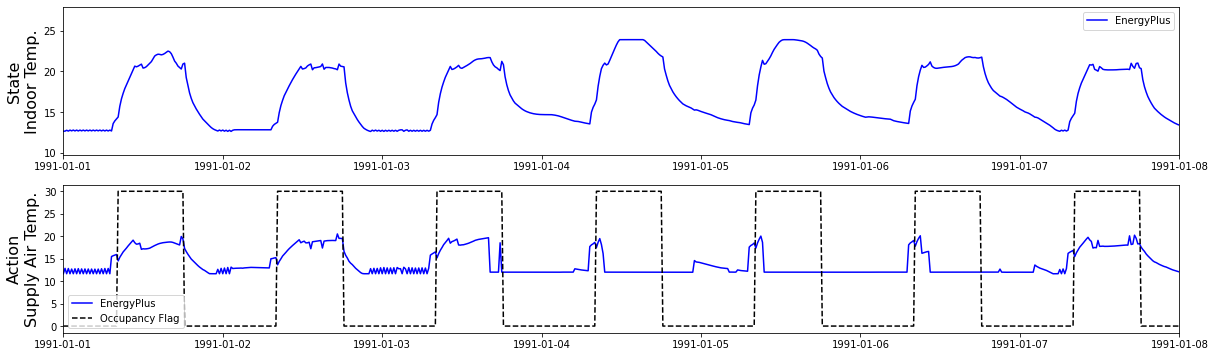

In [19]:
start_time = pd.datetime(year = 1991, month = 1, day = 1)
end_time = start_time + pd.Timedelta(days = 7)
plotBaseline(baseline, start_time, end_time)